In [4]:
import datetime
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

Creating a function to convert to data to Date object.

In [5]:
def convertToDate(dateString):
    dateType = "%Y-%m-%d"
    timestamp = datetime.datetime.strptime(dateString,dateType)
    return timestamp.date()

### Collecting the Daily weather data for from weather underground for last Six years. 

Includes maximum, minimum, mean temperatures along with dew point, humidity, Sea Level Pressure, Visibility, Wind Speed, Precipitation. 
Getting the historic data from Weather Underground with their api's for daily temperature.
Creating dataframe with data from 2010 to 2016. 

In [6]:
urls = ['https://www.wunderground.com/history/airport/KMGE/2010/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2010&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1',
        'https://www.wunderground.com/history/airport/KMGE/2011/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2011&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1',
        'https://www.wunderground.com/history/airport/KMGE/2012/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2012&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1',
        'https://www.wunderground.com/history/airport/KMGE/2013/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2013&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1',
        'https://www.wunderground.com/history/airport/KMGE/2014/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2014&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1',
        'https://www.wunderground.com/history/airport/KMGE/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1',    
        'https://www.wunderground.com/history/airport/KMGE/2016/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2016&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1']

dfs = [pd.read_csv(url) for url in urls] # looping to get all six url. 




### Creating dataframe.

Concating all the datafrmes to create one. 
Verifying the "EST" cloumn for unique.
Observing the column names and number of rows. 

In [7]:
df = pd.concat(dfs) 

In [8]:
df.EST.unique() 

array(['2010-1-1', '2010-1-2', '2010-1-3', ..., '2016-12-29', '2016-12-30',
       '2016-12-31'], dtype=object)

In [9]:
df.count() 

EST                           2557
Max TemperatureF              2557
Mean TemperatureF             2557
Min TemperatureF              2557
Max Dew PointF                2557
MeanDew PointF                2557
Min DewpointF                 2557
Max Humidity                  2557
 Mean Humidity                2557
 Min Humidity                 2557
 Max Sea Level PressureIn     2557
 Mean Sea Level PressureIn    2557
 Min Sea Level PressureIn     2557
 Max VisibilityMiles          2557
 Mean VisibilityMiles         2557
 Min VisibilityMiles          2557
 Max Wind SpeedMPH            2557
 Mean Wind SpeedMPH           2557
 Max Gust SpeedMPH            1357
PrecipitationIn               2557
 CloudCover                   2557
 Events                       1042
 WindDirDegrees<br />         2557
dtype: int64

### Trimming the blank space before the column name and replacing space with '_'.

In [10]:
df.columns = df.columns.str.strip() 

In [11]:
df.columns = df.columns.str.replace(' ', '_') 

In [12]:
df.count() # Verifying the changes. 

EST                          2557
Max_TemperatureF             2557
Mean_TemperatureF            2557
Min_TemperatureF             2557
Max_Dew_PointF               2557
MeanDew_PointF               2557
Min_DewpointF                2557
Max_Humidity                 2557
Mean_Humidity                2557
Min_Humidity                 2557
Max_Sea_Level_PressureIn     2557
Mean_Sea_Level_PressureIn    2557
Min_Sea_Level_PressureIn     2557
Max_VisibilityMiles          2557
Mean_VisibilityMiles         2557
Min_VisibilityMiles          2557
Max_Wind_SpeedMPH            2557
Mean_Wind_SpeedMPH           2557
Max_Gust_SpeedMPH            1357
PrecipitationIn              2557
CloudCover                   2557
Events                       1042
WindDirDegrees<br_/>         2557
dtype: int64

In [13]:
df.describe() #Pandas Describe Method. 

,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,Mean_Sea_Level_PressureIn,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,1357.000000,2557.000000,2557.000000
mean,71.942902,62.009386,52.269847,55.755573,51.079390,45.525225,90.714509,71.513883,47.055534,30.144630,30.068436,29.996042,9.993743,9.077434,6.682440,13.822057,5.644505,24.782609,0.114478,4.078999
std,15.772761,15.292528,15.812425,15.595210,16.736998,18.308665,9.965582,14.860367,16.954165,0.151487,0.153322,0.159619,0.136895,1.553766,3.710164,5.310766,3.237946,6.613479,0.307987,2.549973
min,22.000000,13.000000,4.000000,3.000000,-4.000000,-13.000000,41.000000,27.000000,9.000000,29.640000,29.530000,29.400000,5.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000
25%,60.000000,50.000000,39.000000,45.000000,39.000000,31.000000,86.000000,61.000000,35.000000,30.040000,29.970000,29.900000,10.000000,9.000000,3.000000,10.000000,3.000000,20.000000,0.000000,2.000000
50%,75.000000,64.000000,54.000000,59.000000,54.000000,48.000000,93.000000,71.000000,46.000000,30.130000,30.060000,29.990000,10.000000,10.000000,8.000000,13.000000,5.000000,23.000000,0.000000,4.000000
75%,85.000000,76.000000,67.000000,69.000000,65.000000,62.000000,100.000000,84.000000,57.000000,30.240000,30.160000,30.100000,10.000000,10.000000,10.000000,16.000000,7.000000,28.000000,0.030000,6.000000
max,103.000000,91.000000,79.000000,78.000000,76.000000,73.000000,100.000000,100.000000,100.000000,30.650000,30.570000,30.530000,10.000000,10.000000,10.000000,41.000000,22.000000,70.000000,2.650000,8.000000


### Drop the columns with null values.  

In [14]:
df.drop(['Max_Gust_SpeedMPH','Events', 'WindDirDegrees<br_/>'], axis=1, inplace=True)

In [15]:
df.shape #Checking the number of rows and columns in Tuple. 

(2557, 20)

### Convert the "EST" to date object and set as an Index. 

In [16]:
df["EST"] = df["EST"].apply(convertToDate)
df.set_index('EST', inplace=True) #Setting the EST to index column.
df.sort_index(inplace = True)

### Split the datafame in to two part for prediction purpose. 

Using from 2010 to 2015 for train data.

In [17]:
dfTrain = df[ df.index < datetime.date(2016, 1, 1) ]  

### Convert index to datetime for the train dataframe

In [18]:
dfTrain.index = pd.to_datetime(dfTrain.index)

In [19]:
df.sort_index(inplace = True) #Sorting the index just incase. 

In [20]:
dfTrain.shape

(2191, 19)

In [21]:
print dfTrain.head()
print dfTrain.tail()

            Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
EST                                                                 
2010-01-01                45                 38                29   
2010-01-02                31                 26                21   
2010-01-03                32                 25                18   
2010-01-04                29                 23                17   
2010-01-05                32                 24                16   

            Max_Dew_PointF  MeanDew_PointF  Min_DewpointF  Max_Humidity  \
EST                                                                       
2010-01-01              43              34             18            94   
2010-01-02              17              12              9            68   
2010-01-03              10               6              0            70   
2010-01-04              13              10              7            71   
2010-01-05              12               9              6         

### Creating test dataframe.

In [22]:
dfTest = df[ df.index >= datetime.date(2016, 1, 1) ]

In [23]:
dfTest.index = pd.to_datetime(dfTest.index) #Insuring the index is DateTime

In [24]:
dfTest.head()

,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,Mean_Sea_Level_PressureIn,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,PrecipitationIn,CloudCover
EST,,,,,,,,,,,,,,,,,,,
2016-01-01,44,41,38,38,33,28,88,74,60,30.29,30.22,30.16,10,10,10,15,10,0.0,7
2016-01-02,46,40,33,29,27,24,76,61,42,30.32,30.24,30.17,10,10,10,13,10,0.0,4
2016-01-03,52,42,33,31,28,25,77,60,35,30.15,30.08,30.01,10,10,10,13,7,0.0,4
2016-01-04,43,37,31,28,23,15,78,57,41,30.37,30.17,30.01,10,10,10,20,11,0.0,0
2016-01-05,43,34,25,18,14,9,71,47,26,30.55,30.48,30.41,10,10,10,12,5,0.0,0


### Plotting the resample Train data by Day for Max, min and mean tremperature. 

/Users/iwdhoury/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


/Users/iwdhoury/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


/Users/iwdhoury/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


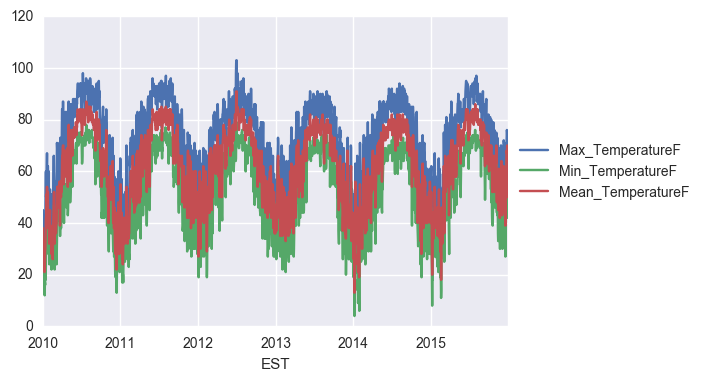

In [25]:
tempDayMax = dfTrain['Max_TemperatureF'].resample('D')
tempDayMin = dfTrain['Min_TemperatureF'].resample('D')
tempDayMean = dfTrain['Mean_TemperatureF'].resample('D')

tempDayMax.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
tempDayMin.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
tempDayMean.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Plotting the resample Train data by Month for Max, min and mean tremperature. 

/Users/iwdhoury/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


/Users/iwdhoury/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


/Users/iwdhoury/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


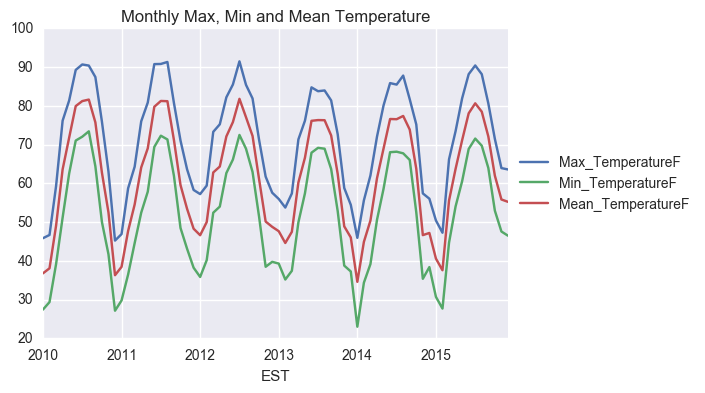

In [26]:
tempMonthMax = dfTrain['Max_TemperatureF'].resample('M')
tempMonthMin = dfTrain['Min_TemperatureF'].resample('M')
tempMonthMean = dfTrain['Mean_TemperatureF'].resample('M')

tempMonthMax.plot(title ='Monthly Max, Min and Mean Temperature')
tempMonthMin.plot()
tempMonthMean.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Using Time Series statistics. 

### Capturing the autocorrelation of the mean for Mean Temperature resample by Day 

In [27]:
average_daily_temp = dfTrain[['Mean_TemperatureF']].resample('D').mean()

print('Correlation with last day: {}'.format(average_daily_temp['Mean_TemperatureF'].autocorr(lag=1)))
print('Correlation with last week: {}'.format(average_daily_temp['Mean_TemperatureF'].autocorr(lag=7)))
print('Correlation with last month: {}'.format(average_daily_temp['Mean_TemperatureF'].autocorr(lag=30)))
print('Correlation with last year: {}'.format(average_daily_temp['Mean_TemperatureF'].autocorr(lag=365)))


#As the lag is incresed the correlation seems to be decresing. 

Correlation with last day: 0.949043635902
Correlation with last week: 0.82460078903
Correlation with last month: 0.722159124116
Correlation with last year: 0.789554880442


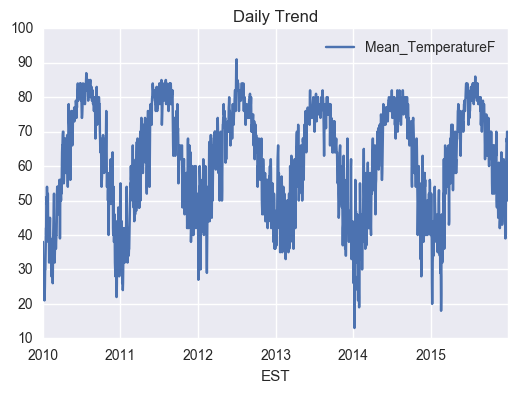

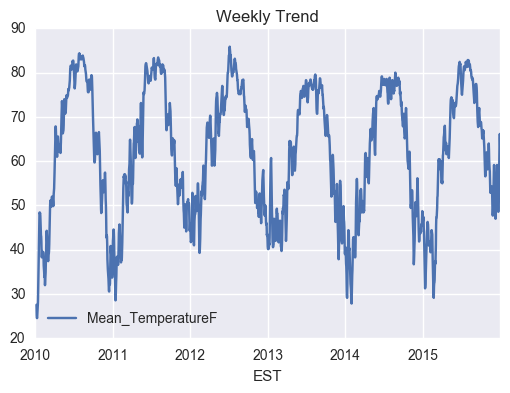

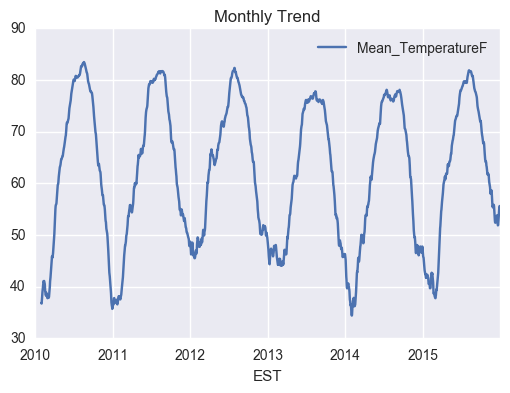

In [28]:
dfDay = dfTrain[['Mean_TemperatureF']].resample('D').mean().rolling(window=1).mean()
dfWeek = dfTrain[['Mean_TemperatureF']].resample('D').mean().rolling(window=7).mean()
dfMonth = dfTrain[['Mean_TemperatureF']].resample('D').mean().rolling(window=30).mean()

dfDay.plot(title ='Daily Trend')
dfWeek.plot(title ='Weekly Trend')
dfMonth.plot(title ='Monthly Trend')

### Rolling Averages for the Train dataframe. 

In [29]:
#by rolling up to Day level. 

dfRollingDay = dfTrain[['Mean_TemperatureF']].resample('D').apply(['median', 'mean'])

In [30]:
#by rolling up to Month level. 

dfRollingMonth = dfTrain[['Mean_TemperatureF']].resample('M').apply(['median', 'mean'])

### Ploting the rolling averge values. 

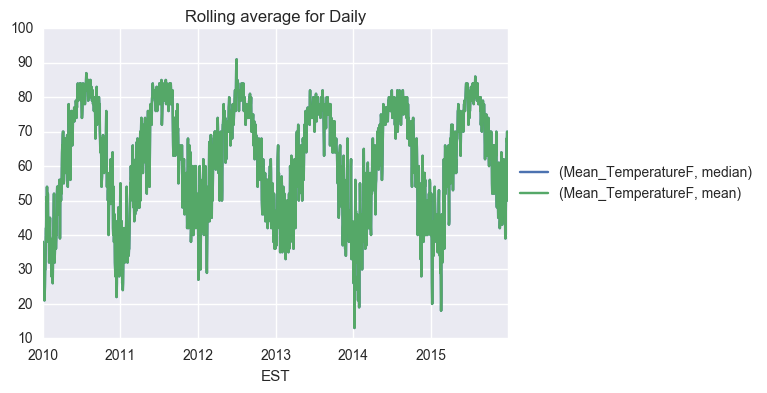

In [31]:
dfRollingDay.plot(title = 'Rolling average for Daily').legend(loc='center left', bbox_to_anchor=(1, 0.5))

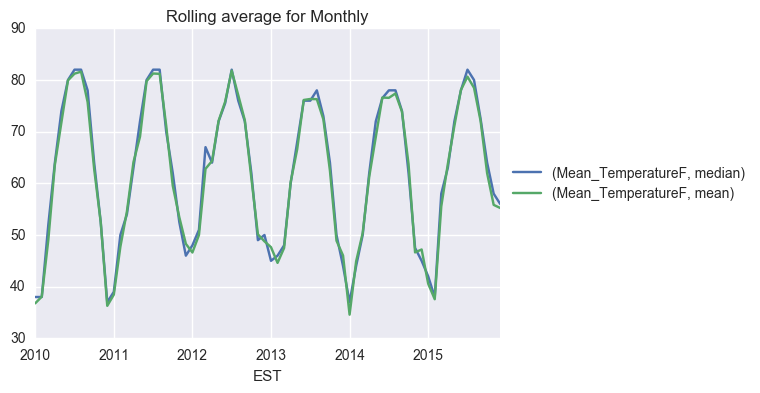

In [32]:
dfRollingMonth.plot(title = 'Rolling average for Monthly').legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Rolling average  using window value. 

To understand the change in weather temp, want to use 7 days mean temperature have a relative data for smaller window.

In [33]:
dfTrain['Mean_TemperatureF'].resample('D').mean().rolling(window=7, center=True).mean().head() 
dfTrain['Mean_TemperatureF'].resample('W').mean().rolling(window=7, center=True).mean().head() 

EST
2010-01-01          NaN
2010-01-02          NaN
2010-01-03          NaN
2010-01-04    27.571429
2010-01-05    25.142857
Freq: D, Name: Mean_TemperatureF, dtype: float64

EST
2010-01-03          NaN
2010-01-10          NaN
2010-01-17          NaN
2010-01-24    36.176871
2010-01-31    37.469388
Freq: W-SUN, Name: Mean_TemperatureF, dtype: float64

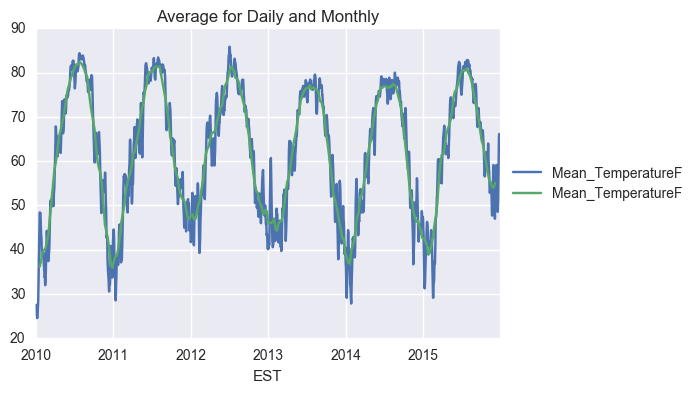

In [34]:
dfTrain['Mean_TemperatureF'].resample('D').mean().rolling(window=7, center=True).mean().plot(title='Average for Daily and Monthly')
dfTrain['Mean_TemperatureF'].resample('W').mean().rolling(window=7, center=True).mean().plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

### 

Creating a dataframe from the train set with weekly mean temperature. Then from pandas autocorrelation_plot to plot them. 

In [35]:
mean_weekly_temp = dfTrain[['Mean_TemperatureF']].resample('W', 'mean')

/Users/iwdhoury/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


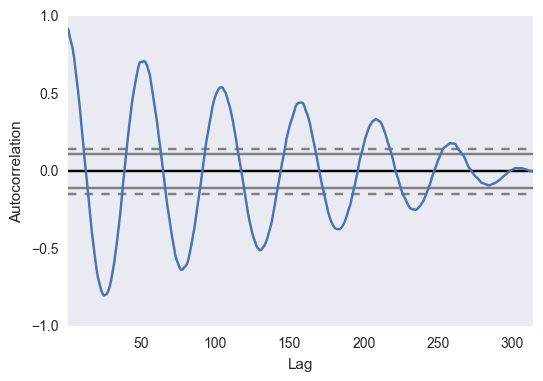

In [36]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(mean_weekly_temp['Mean_TemperatureF'])

Using the weekly resample data, plotting with smaller lag to see the Trend. 

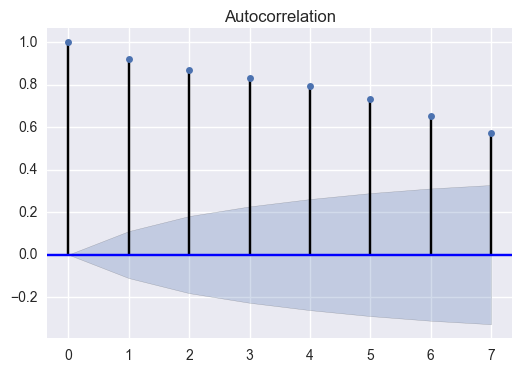

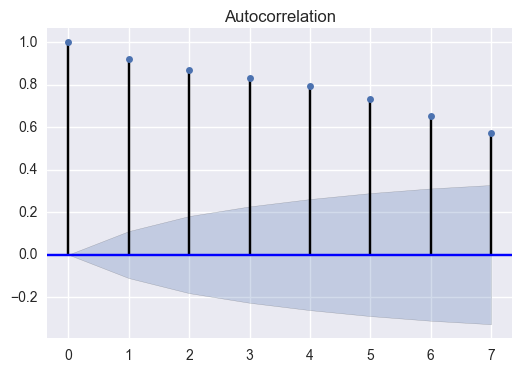

In [37]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(mean_weekly_temp['Mean_TemperatureF'], lags=7)